<a href="https://colab.research.google.com/github/youseefmoemen/Neural-Network/blob/main/ArSL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install ImageHash
!pip install visualkeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 296 kB 31.0 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 989 kB 39.6 MB/s 


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import matplotlib.image as mpimg
import seaborn as sns
from tensorflow import keras, data, io, strings, image, random
import tensorflow as tf
import time
from IPython import display
import glob
import imageio
from tensorflow.python.data.ops.dataset_ops import AUTOTUNE
import visualkeras
from PIL import ImageFont

In [3]:
!wget https://data.mendeley.com/public-files/datasets/y7pckrw6z2/files/1efa0d6b-4d7f-4f58-9584-08f0488279ee/file_downloaded -O images
!unzip "/content/images"

Streaming output truncated to the last 5000 lines.
 extracting: ArASL_Database_54K_Final/waw/WAW (451).JPG  
 extracting: ArASL_Database_54K_Final/waw/WAW (452).JPG  
 extracting: ArASL_Database_54K_Final/waw/WAW (453).JPG  
 extracting: ArASL_Database_54K_Final/waw/WAW (454).JPG  
 extracting: ArASL_Database_54K_Final/waw/WAW (455).JPG  
 extracting: ArASL_Database_54K_Final/waw/WAW (456).JPG  
 extracting: ArASL_Database_54K_Final/waw/WAW (457).JPG  
 extracting: ArASL_Database_54K_Final/waw/WAW (458).JPG  
 extracting: ArASL_Database_54K_Final/waw/WAW (459).JPG  
 extracting: ArASL_Database_54K_Final/waw/WAW (46).JPG  
 extracting: ArASL_Database_54K_Final/waw/WAW (460).JPG  
 extracting: ArASL_Database_54K_Final/waw/WAW (461).JPG  
 extracting: ArASL_Database_54K_Final/waw/WAW (462).JPG  
 extracting: ArASL_Database_54K_Final/waw/WAW (463).JPG  
 extracting: ArASL_Database_54K_Final/waw/WAW (464).JPG  
 extracting: ArASL_Database_54K_Final/waw/WAW (465).JPG  
 extracting: ArASL_Dat

In [4]:
files = os.listdir('/content/ArASL_Database_54K_Final')
len(files)

32

In [6]:
# from PIL import Image
# import numpy as np
# import os
# import cv2
# from os import path
# def alpharemover(image):
#   if image.mode != 'RGBA':
#     return image
#   canvas = Image.new('RGBA', image.size, (255,255,255,255))
#   canvas.paste(image, mask=image)
#   return canvas.convert('RGB')
# def with_ztransform_preprocess(hashfunc, hash_size=4):
#   def function(path):
#     image = alpharemover(Image.open(path))
#     image = image.convert("L").resize((hash_size, hash_size), Image.ANTIALIAS)
#     data = image.getdata()
#     quantiles = np.arange(100)
#     quantiles_values = np.percentile(data, quantiles)
#     zdata = (np.interp(data, quantiles_values, quantiles) / 100 * 255).astype(np.uint8)
#     image.putdata(zdata)
#     return hashfunc(image)
#     return function
# hasher = with_ztransform_preprocess(imagehash, dhash, hash_size = 5)
# input_folder = r"C:....."
# output_folder = r"C:...."
# def remove_duplicates(hash_algorithm,directory):
#   image_list = os.listdir(directory)
#   hash_set = set()
#   for im_name in image_list:
#     image_path = path.join(directory,im_name)
#     image_hash = hash_algorithm(image_path)
#   if image_hash not in hash_set:
#     hash_set.add(image_hash)
#     image = cv2.imread(image_path)
#     cv2.imwrite(os.path.join(output_folder,im_name),image)
#     remove_duplicates(hasher,input_folder)

NameError: ignored

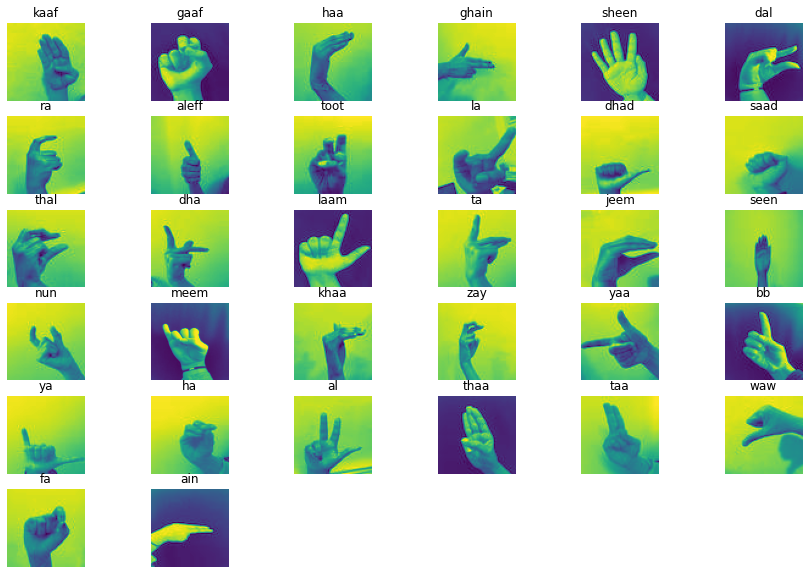

In [7]:
plt.figure(figsize = (15, 10))
for idx, i in enumerate(files):
  plt.subplot(6, 6, idx+1)
  img_path = os.listdir('/content/ArASL_Database_54K_Final/' + i)[0]
  img = mpimg.imread('/content/ArASL_Database_54K_Final/'+i + '/'+img_path)
  imgplot = plt.imshow(img)
  plt.title(i)
  plt.axis('off')

In [8]:
data_spec = dict()
for i in files:
    data_spec[i] = len(os.listdir('ArASL_Database_54K_Final/' + i))

In [9]:
data_spec = pd.DataFrame({
    'letter': data_spec.keys(),
    'count': data_spec.values()
})

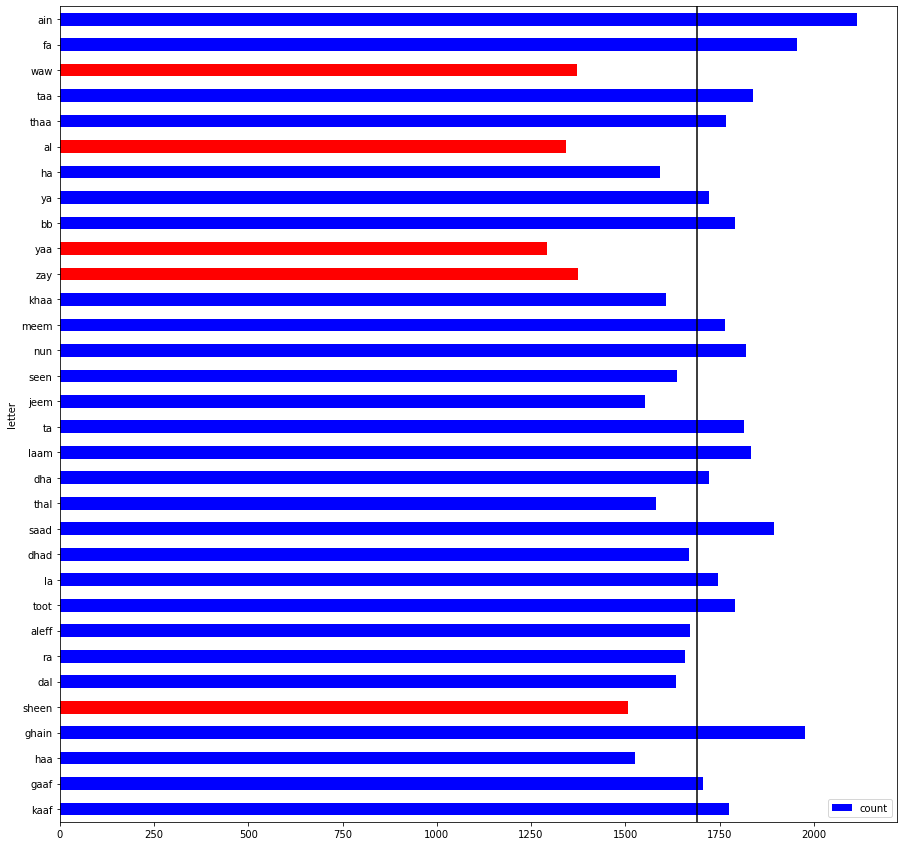

In [10]:
colors = ['red' if i in set(data_spec.sort_values(['count'])[:5].letter) else 'blue' for i in data_spec.letter ]
data_spec.plot(x = 'letter', y = 'count', kind = 'barh', figsize=(15, 15),
               color = colors)
plt.axvline(x = data_spec['count'].mean(), color = 'black')
plt.show()

In [11]:
data_list = pd.DataFrame({
    'file_path':[],
    'label':[]
})
for idx, i in enumerate(files):
    paths = os.listdir('ArASL_Database_54K_Final/' + i)
    labels = [i] * len(paths)
    paths = [i + '/' + j for j in paths]
    data_list = data_list.append(pd.DataFrame(np.c_[paths, labels], columns=['file_path', 'label']), ignore_index=True)
data_list['file_path'] = 'ArASL_Database_54K_Final/' + data_list['file_path']

In [12]:
from sklearn.preprocessing import OrdinalEncoder
orde = OrdinalEncoder()
data_list['label'] = orde.fit_transform(np.array(data_list['label']).reshape(-1, 1))

In [13]:
data_list.head()

,file_path,label
0,ArASL_Database_54K_Final/kaaf/KAAF (1762).jpg,13.0
1,ArASL_Database_54K_Final/kaaf/KAAF (1495).jpg,13.0
2,ArASL_Database_54K_Final/kaaf/KAAF (1251).jpg,13.0
3,ArASL_Database_54K_Final/kaaf/KAAF (873).jpg,13.0
4,ArASL_Database_54K_Final/kaaf/KAAF (325).jpg,13.0


In [14]:
from sklearn.model_selection import StratifiedShuffleSplit
sss = StratifiedShuffleSplit(n_splits=1)
train_files, train_labels, val_files, val_labels = None, None, None, None
labels = keras.utils.to_categorical(data_list.label)
for train_idx, val_idx in sss.split(data_list.file_path, data_list.label):
    train_files = data_list.file_path.loc[train_idx]
    train_labels = labels[train_idx]
    val_files = data_list.file_path.loc[val_idx]
    val_labels = labels[val_idx]

In [15]:
def processfiles(path, label):
  img = io.read_file(path)
  img = io.decode_jpeg(img, channels=1)
  img = image.resize(img, (64, 64))
  img = image.per_image_standardization(img)
  return img, label

In [16]:
train_data = data.Dataset.from_tensor_slices((train_files, train_labels))
val_data = data.Dataset.from_tensor_slices((val_files, val_labels))
train_data = train_data.map(processfiles)
train_data = train_data.shuffle(buffer_size=128).batch(batch_size=32, drop_remainder=True).prefetch(buffer_size = AUTOTUNE)
val_data = val_data.map(processfiles).shuffle(buffer_size=128).batch(batch_size=32, drop_remainder=True).prefetch(buffer_size = AUTOTUNE)

In [17]:
model = keras.models.Sequential([
    keras.layers.Input(shape=(64, 64, 1)),
    keras.layers.Conv2D(filters = 30, kernel_size = 3, strides = 2,
     padding = 'same', activation = 'relu'),
    keras.layers.Conv2D(filters = 100, kernel_size = 3, strides = 2,
     padding = 'same', activation = 'relu'),
    keras.layers.Conv2D(filters = 200, kernel_size = 3, strides = 2,
     padding = 'same', activation = 'relu'),
    keras.layers.AvgPool2D(),
    keras.layers.Flatten(),
    keras.layers.Dense(1000, activation = 'relu'),
    keras.layers.Dense(32, activation = 'softmax')
])

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 30)        300       
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 100)       27100     
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 200)         180200    
                                                                 
 average_pooling2d (AverageP  (None, 4, 4, 200)        0         
 ooling2D)                                                       
                                                                 
 flatten (Flatten)           (None, 3200)              0         
                                                                 
 dense (Dense)               (None, 1000)              3201000   
                                                        

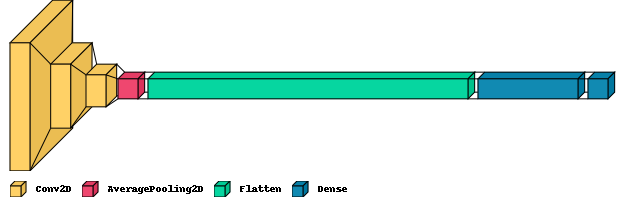

In [19]:
font = ImageFont.load_default()
visualkeras.layered_view(model, legend=True, font=font)

In [20]:
model.compile(loss = keras.losses.CategoricalCrossentropy(),
              metrics = ['accuracy', keras.metrics.Precision(),keras.metrics.Recall(),keras.metrics.AUC()],
              optimizer = keras.optimizers.Adam(3e-4))

In [21]:
history = model.fit(train_data, epochs = 10, validation_data = val_data)

Epoch 1/10
1520/1520 [==============================] - 36s 15ms/step - loss: 0.9380 - accuracy: 0.7294 - precision: 0.9012 - recall: 0.6392 - auc: 0.9787 - val_loss: 0.2784 - val_accuracy: 0.9282 - val_precision: 0.9520 - val_recall: 0.9141 - val_auc: 0.9951
Epoch 2/10
1520/1520 [==============================] - 23s 15ms/step - loss: 0.1965 - accuracy: 0.9468 - precision: 0.9653 - recall: 0.9370 - auc: 0.9971 - val_loss: 0.1780 - val_accuracy: 0.9574 - val_precision: 0.9689 - val_recall: 0.9494 - val_auc: 0.9966
Epoch 3/10
1520/1520 [==============================] - 24s 16ms/step - loss: 0.1063 - accuracy: 0.9704 - precision: 0.9794 - recall: 0.9649 - auc: 0.9986 - val_loss: 0.1701 - val_accuracy: 0.9587 - val_precision: 0.9672 - val_recall: 0.9548 - val_auc: 0.9960
Epoch 4/10
1520/1520 [==============================] - 24s 16ms/step - loss: 0.0644 - accuracy: 0.9811 - precision: 0.9850 - recall: 0.9776 - auc: 0.9993 - val_loss: 0.1639 - val_accuracy: 0.9637 - val_precision: 0.9694

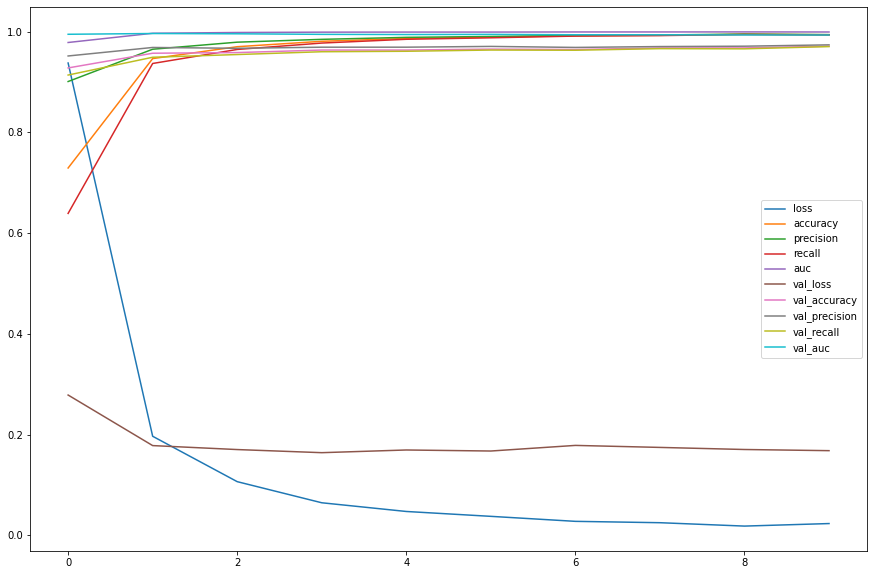

In [22]:
pd.DataFrame(history.history).plot(figsize=(15, 10))
plt.show()

In [23]:
from sklearn.metrics import confusion_matrix
predictions = np.argmax(model.predict(val_data), axis=1)
mat = confusion_matrix(np.argmax(val_labels[:5376], axis = 1), predictions)

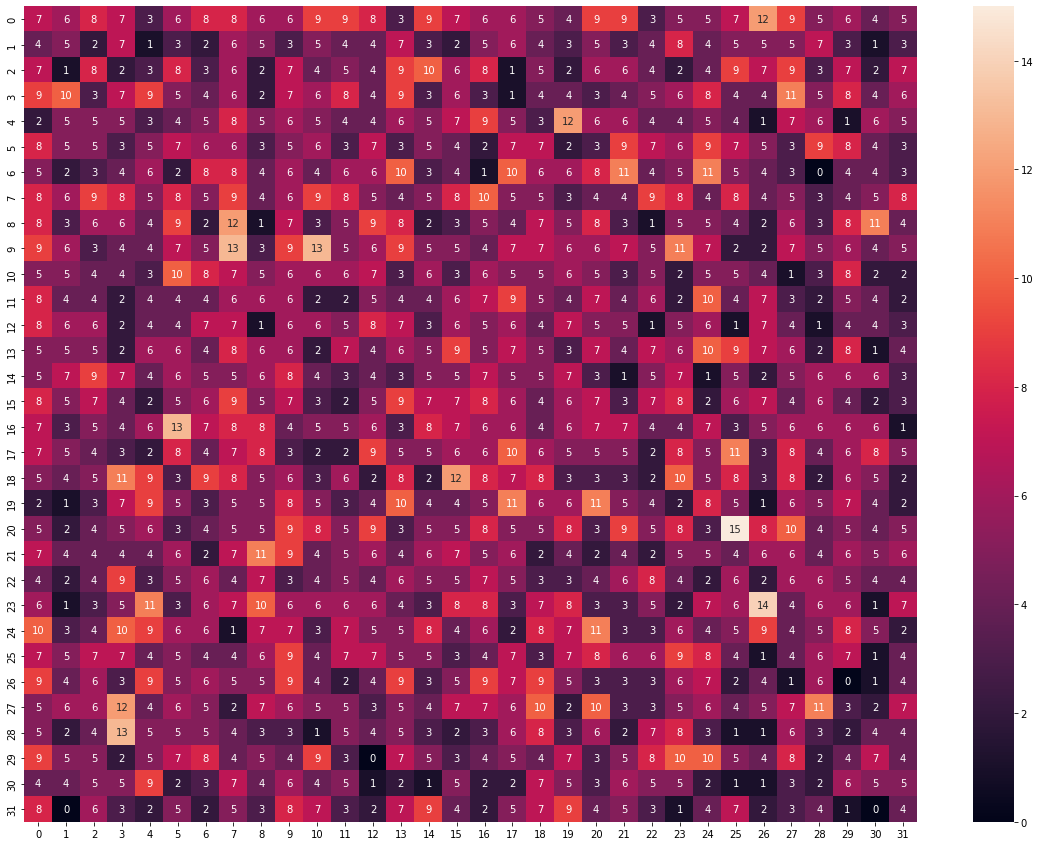

In [24]:
plt.figure(figsize = (20, 15))
sns.heatmap(mat, annot=True)
plt.show()

In [25]:
height, width, scale, factor = 64, 64, 0.1, 0.1
'''data_augmentation = keras.models.Sequential([
  keras.layers.Resizing(height, width, interpolation='bilinear', crop_to_aspect_ratio=False),
  keras.layers.Rescaling(scale, offset=0.0),
  keras.layers.RandomCrop(height, width, seed=None),
  keras.layers.RandomZoom( height_factor=(0.2, 0.3), width_factor=None, fill_mode='reflect', interpolation='bilinear', seed=None, fill_value=0.0),
  keras.layers.RandomContrast(factor, seed=None),
#  keras.layers.RandomHeight(factor, interpolation='bilinear', seed=None),
#  keras.layers.RandomWidth(factor, interpolation='bilinear', seed=None),
])'''
model2 = keras.models.Sequential([
    keras.layers.Resizing(height, width, interpolation='bilinear', crop_to_aspect_ratio=False),
    keras.layers.Rescaling(scale, offset=0.0),
    keras.layers.RandomCrop(height, width, seed=None),
    keras.layers.RandomZoom( height_factor=(0.2, 0.3), width_factor=None, fill_mode='reflect', interpolation='bilinear', seed=None, fill_value=0.0),
    keras.layers.RandomContrast(factor, seed=None),
    keras.layers.Conv2D(filters = 30, kernel_size = 3, strides = 2,
     padding = 'same', activation = 'relu'),
    keras.layers.Conv2D(filters = 100, kernel_size = 3, strides = 2,
     padding = 'same', activation = 'relu'),
    keras.layers.Conv2D(filters = 200, kernel_size = 3, strides = 2,
     padding = 'same', activation = 'relu'),
    keras.layers.AvgPool2D(),
    keras.layers.Flatten(),
    keras.layers.Dense(1000, activation = 'relu'),
    keras.layers.Dense(32, activation = 'softmax')
])

In [26]:
model2.compile(loss = keras.losses.CategoricalCrossentropy(),
              metrics = ['accuracy', keras.metrics.Precision(),keras.metrics.Recall(),keras.metrics.AUC()],
              optimizer = keras.optimizers.Adam(3e-4))

In [27]:
history = model2.fit(train_data, epochs = 10, validation_data = val_data)

Epoch 1/10
1520/1520 [==============================] - 26s 16ms/step - loss: 1.5639 - accuracy: 0.5380 - precision_1: 0.8337 - recall_1: 0.3890 - auc_1: 0.9460 - val_loss: 1.0441 - val_accuracy: 0.6832 - val_precision_1: 0.7425 - val_recall_1: 0.6390 - val_auc_1: 0.9725
Epoch 2/10
1520/1520 [==============================] - 25s 16ms/step - loss: 0.3810 - accuracy: 0.8991 - precision_1: 0.9351 - recall_1: 0.8716 - auc_1: 0.9930 - val_loss: 0.8712 - val_accuracy: 0.7550 - val_precision_1: 0.7890 - val_recall_1: 0.7240 - val_auc_1: 0.9761
Epoch 3/10
1520/1520 [==============================] - 25s 16ms/step - loss: 0.2103 - accuracy: 0.9442 - precision_1: 0.9626 - recall_1: 0.9341 - auc_1: 0.9965 - val_loss: 0.8780 - val_accuracy: 0.7634 - val_precision_1: 0.7909 - val_recall_1: 0.7467 - val_auc_1: 0.9725
Epoch 4/10
1520/1520 [==============================] - 25s 16ms/step - loss: 0.1372 - accuracy: 0.9626 - precision_1: 0.9743 - recall_1: 0.9553 - auc_1: 0.9981 - val_loss: 0.8653 - va

In [28]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resizing (Resizing)         (32, 64, 64, 1)           0         
                                                                 
 rescaling (Rescaling)       (32, 64, 64, 1)           0         
                                                                 
 random_crop (RandomCrop)    (32, 64, 64, 1)           0         
                                                                 
 random_zoom (RandomZoom)    (32, 64, 64, 1)           0         
                                                                 
 random_contrast (RandomCont  (32, 64, 64, 1)          0         
 rast)                                                           
                                                                 
 conv2d_3 (Conv2D)           (32, 32, 32, 30)          300       
                                                      

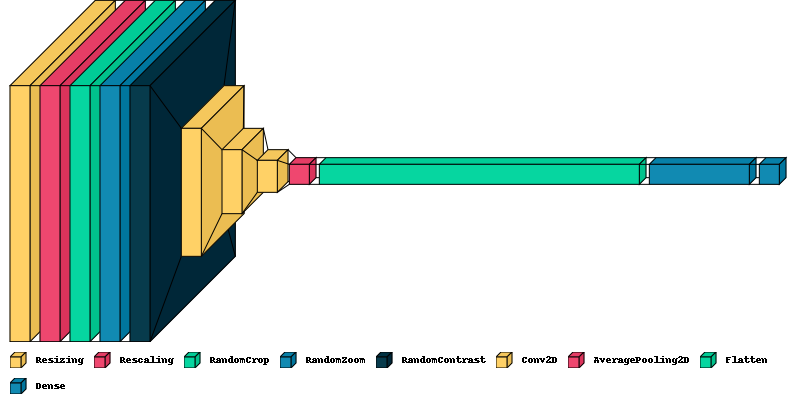

In [29]:
visualkeras.layered_view(model2, legend=True, font=font)

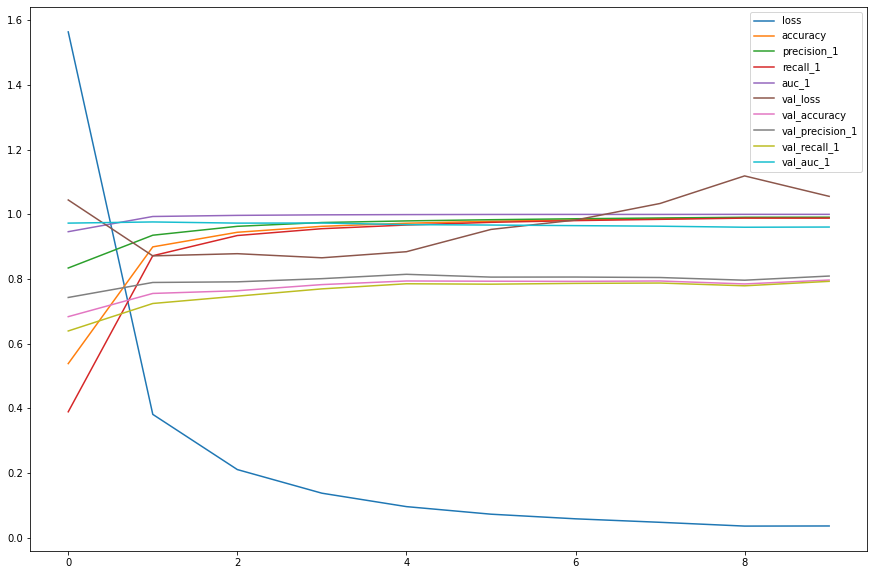

In [30]:
pd.DataFrame(history.history).plot(figsize=(15, 10))
plt.show()

In [31]:
from sklearn.metrics import confusion_matrix
predictions = np.argmax(model.predict(val_data), axis=1)
mat = confusion_matrix(np.argmax(val_labels[:5376], axis = 1), predictions)

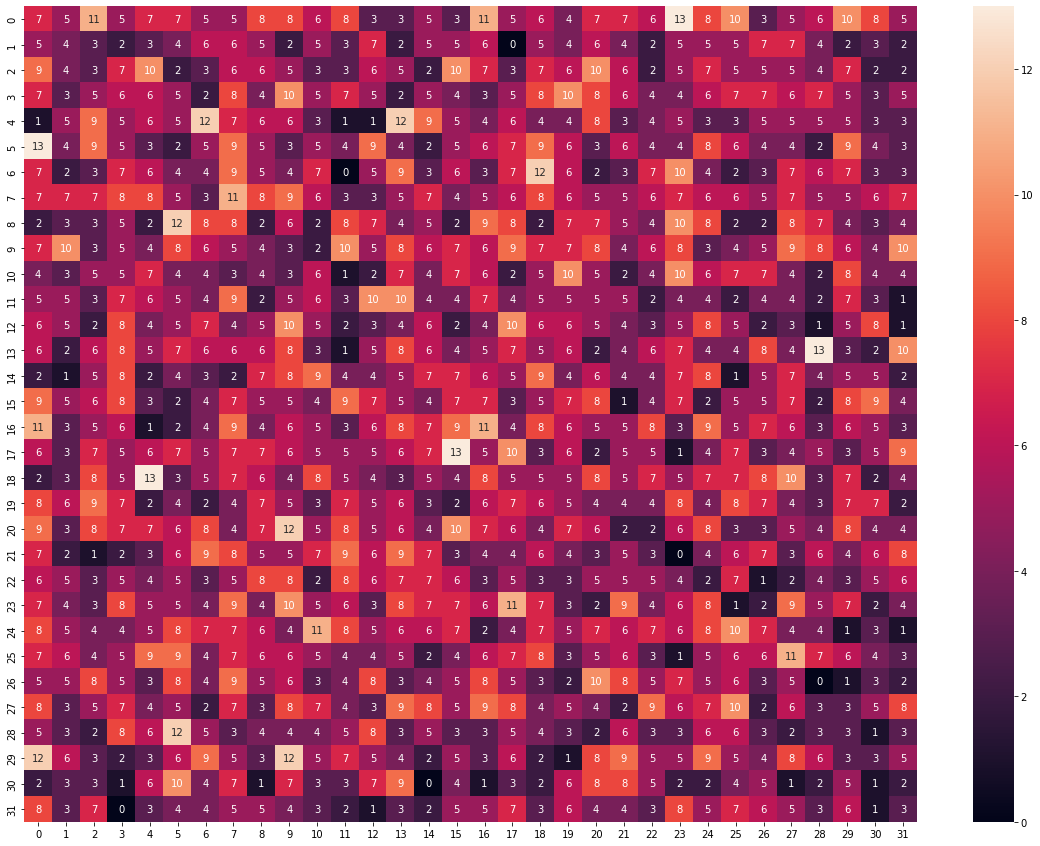

In [32]:
plt.figure(figsize = (20, 15))
sns.heatmap(mat, annot=True)
plt.show()

In [33]:
def make_generator_model():
    model = keras.Sequential()
    model.add(keras.layers.Dense(4*4*512, input_shape=(1000,)))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.LeakyReLU())

    model.add(keras.layers.Reshape((4, 4, 512)))
    assert model.output_shape == (None, 4, 4, 512)  # Note: None is the batch size

    model.add(keras.layers.Conv2DTranspose(256, (5, 5), strides=(2, 2), padding='same'))
    assert model.output_shape == (None, 8, 8, 256)
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.LeakyReLU())

    model.add(keras.layers.Conv2DTranspose(128, (5, 5), strides=(2, 2), padding='same'))
    assert model.output_shape == (None, 16, 16, 128)
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.LeakyReLU())
    
    model.add(keras.layers.Conv2DTranspose(64, (5, 5), strides=(2, 2), padding='same'))
    assert model.output_shape == (None, 32, 32, 64)
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.LeakyReLU())

    model.add(keras.layers.Conv2DTranspose(1, (5, 5), strides=(2, 2), padding='same'))
    assert model.output_shape == (None, 64, 64, 1)

    return model

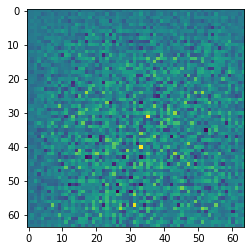

In [34]:
generator = make_generator_model()

noise = random.normal([1, 1000])
generated_image = generator(noise, training=False)

plt.imshow(generated_image[0, :, :, 0])
plt.show()

In [35]:
def make_discriminator_model():
    model = keras.Sequential()
    model.add(keras.layers.Conv2D(64, (5, 5), strides=(2, 2), padding='same',
                                     input_shape=[64, 64, 1]))
    model.add(keras.layers.LeakyReLU())
    model.add(keras.layers.Dropout(0.3))

    model.add(keras.layers.Conv2D(128, (5, 5), strides=(2, 2), padding='same'))
    model.add(keras.layers.LeakyReLU())
    model.add(keras.layers.Dropout(0.3))

    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(1))

    return model

In [36]:
discriminator = make_discriminator_model()
decision = discriminator(generated_image)
print (decision)

tf.Tensor([[-0.00113375]], shape=(1, 1), dtype=float32)


In [37]:
cross_entropy = keras.losses.BinaryCrossentropy(from_logits=True)

In [38]:
def discriminator_loss(real_output, fake_output):
    real_loss = cross_entropy(tf.ones_like(real_output), real_output)
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
    total_loss = real_loss + fake_loss
    return total_loss

In [39]:
def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output), fake_output)

In [40]:
generator_optimizer = tf.keras.optimizers.Adam(1e-4)
discriminator_optimizer = tf.keras.optimizers.Adam(1e-4)

In [41]:
EPOCHS = 80
noise_dim = 1000
num_examples_to_generate = 16
BATCH_SIZE = 256
# You will reuse this seed overtime (so it's easier)
# to visualize progress in the animated GIF)
seed = tf.random.normal([num_examples_to_generate, noise_dim])

In [42]:
def generate_and_save_images(model, epoch, test_input):
  # Notice `training` is set to False.
  # This is so all layers run in inference mode (batchnorm).
  predictions = model(test_input, training=False)

  fig = plt.figure(figsize=(4, 4))

  for i in range(predictions.shape[0]):
      plt.subplot(4, 4, i+1)
      plt.imshow(predictions[i, :, :, 0])
      plt.axis('off')

  plt.savefig('image_at_epoch_{:04d}.png'.format(epoch))
  plt.show()

In [43]:
# Notice the use of `tf.function`
# This annotation causes the function to be "compiled".
def train_step(images):
    noise = tf.random.normal([BATCH_SIZE, noise_dim])

    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
      generated_images = generator(noise, training=True)

      real_output = discriminator(images, training=True)
      fake_output = discriminator(generated_images, training=True)

      gen_loss = generator_loss(fake_output)
      disc_loss = discriminator_loss(real_output, fake_output)

    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))
    return gen_loss, disc_loss

In [44]:
def train(dataset, epochs):
  for epoch in range(epochs):
    start = time.time()
    gen_losses, disc_losses = [], []
    for image_batch in dataset:
      a, b = train_step(image_batch)
      gen_losses.append(a)
      disc_losses.append(b)

    # Produce images for the GIF as you go
    display.clear_output(wait=True)
    generate_and_save_images(generator,
                             epoch + 1,
                             seed)



    print ('Time for epoch {} is {} sec'.format(epoch + 1, time.time()-start))

  # Generate after the final epoch
  display.clear_output(wait=True)
  generate_and_save_images(generator,
                           epochs,
                           seed)
  return gen_losses, disc_losses

In [45]:
def processfiles_gans(path, label):
  img = io.read_file(path)
  img = io.decode_jpeg(img, channels=1)
  img = tf.image.resize(img, (64, 64))
  img = tf.image.per_image_standardization(img)
  return img

In [46]:
train_data = data.Dataset.from_tensor_slices((train_files, train_labels))
val_data = data.Dataset.from_tensor_slices((val_files, val_labels))
train_data = train_data.map(processfiles_gans)
train_data = train_data.shuffle(buffer_size=256).batch(batch_size=256, drop_remainder=True).prefetch(buffer_size = AUTOTUNE)
val_data = val_data.map(processfiles_gans).shuffle(buffer_size=256).batch(batch_size=256, drop_remainder=True).prefetch(buffer_size = AUTOTUNE)

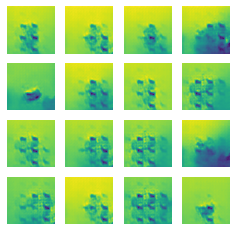

In [47]:
g_loss, d_loss = train(train_data, EPOCHS)

In [48]:
anim_file = 'dcgan.gif'

with imageio.get_writer(anim_file, mode='I') as writer:
  filenames = glob.glob('image*.png')
  filenames = sorted(filenames)
  for filename in filenames:
    image = imageio.imread(filename)
    writer.append_data(image)
  image = imageio.imread(filename)
  writer.append_data(image)

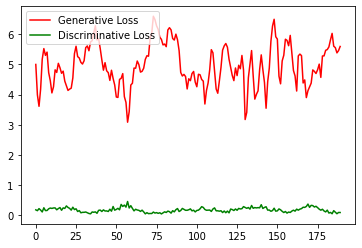

In [49]:
plt.plot(g_loss, 'r', label="Generative Loss")
plt.plot(d_loss, 'g', label="Discriminative Loss")
plt.legend(loc="upper left")
plt.rcParams["figure.figsize"] = (8,8)